# STC Lab 2B : Probability Distributions & Statistical Hypothesis
<strong>Kaustubh Venkatesh<strong><br>
UID : 2018120033<br>
Roll No. : 36<br>
Date : 26-10-2020

In [90]:
#Importing important libraries
import pandas as pd
import numpy as np
import time
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, poisson, norm, uniform, expon, chi2, t, f
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp, f_oneway

In [91]:
#Binomial distribution
#To find the probability of having four or less correct answers by random attempts, we apply the function binom.cdf with x = 0,1,2,3,4. or the pbinom function with x = 4
db = binom.cdf(k = 4, n = 12, p = 0.2)
print('The probability is : ', db)

The probability is :  0.92744450048


C:\Users\Kaustubh\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

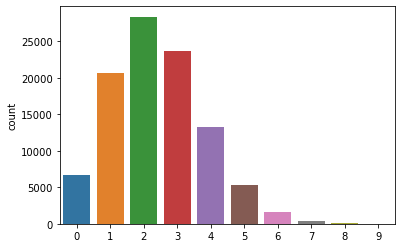

In [92]:
#Generating random values based on binomial distribution
data = binom.rvs(n=12,p=0.2,size=100000)
sns.countplot(data)

In [93]:
#Poisson's Distribution
#The probability of having seventeen or more cars crossing the bridge in a minute is in the upper tail of the probability density function.
prob = 1 - poisson.cdf(k = 16, mu = 12)   # upper tail 
print('The Probability is : ', prob)

The Probability is :  0.10129100743983788


In [105]:
#Continuous uniform distribution
#We apply the generation function runif of the uniform distribution to generate 10 random numbers between one and three.
ran = np.random.uniform(1, 3, 10)
print('The random numbers are : ', ran)

The random numbers are :  [2.36407524 1.22762302 2.15515269 1.78570903 2.117968   2.49234061
 1.84941945 1.45142411 1.6033538  1.71506409]


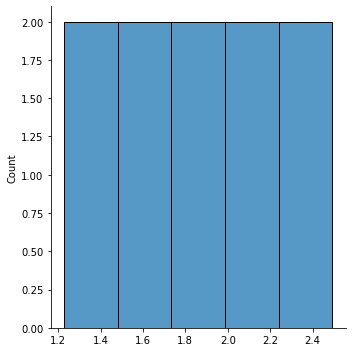

In [106]:
#Plotting the random numbers
sns.displot(ran)

In [107]:
#Normal Distribution
#Since we are looking for the percentage of students scoring higher than 84, we are interested in the upper tail of the normal distribution.

n = 1 - norm.cdf(x = 84, loc=72, scale=15.2)
print('The probability is', n)

The probability is 0.21491760231127244


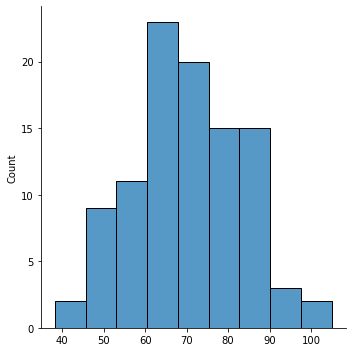

In [108]:
#Plotting the normal distribution
ndata = norm.rvs(loc = 72, scale = 15.2,size = 100)
sns.displot(ndata)

In [109]:
#Exponential Distribution
#We can apply the function pexp of the exponential distribution with rate=1/3 to find out the probability
p = expon.pdf(x = 1/3, scale = 2)
print('The probability is : ', p)

The probability is :  0.42324086244530706


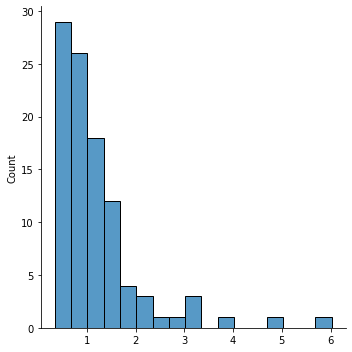

In [110]:
#Plotting the exponential distribution
pdata = expon.rvs(loc = 1/3, size = 100)
sns.displot(pdata)

In [111]:
#Chi-squared distribution
#We apply the chi2 function forthe Chi-Squared distribution against the decimal values 0.95.
per = chi2.ppf(0.95,df=7)       # 7 degrees of freedom 
print('The 95th percentile is : ', per)

The 95th percentile is :  14.067140449340169


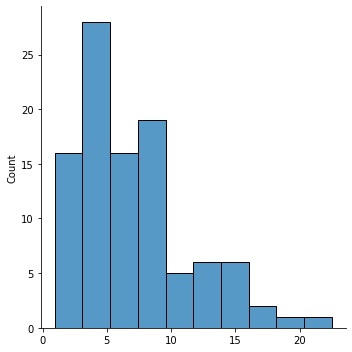

In [112]:
#Plotting the data for chi squared distribution
cdata = chi2.rvs(df = 7, size = 100)
sns.displot(cdata)

In [113]:
#Student t distribution
#We apply the t.ppf of the Student t distribution against the decimal values 0.025 and 0.975.
quant = t.ppf((0.025,0.975),df=5)  # 5 degrees of freedom 
print('The 2.5th and 97.5th percentiles of the distribution are : ', quant )

The 2.5th and 97.5th percentiles of the distribution are :  [-2.57058184  2.57058184]


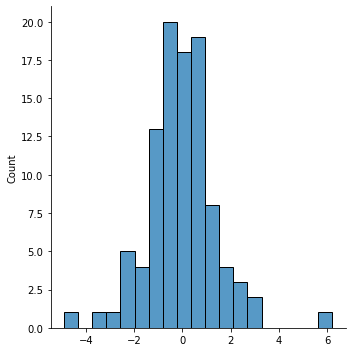

In [114]:
#Plotting the data for t-distribution
tdata = t.rvs(df = 5, size = 100)
sns.displot(tdata)

In [115]:
#F Distribution
#We apply the quantile function qf of the F distribution against the decimal value 0.95.
q = f.ppf(0.95, dfn = 5, dfd = 2)
print('The 95th percentile of the distribution is : ', q)

The 95th percentile of the distribution is :  19.296409652017232


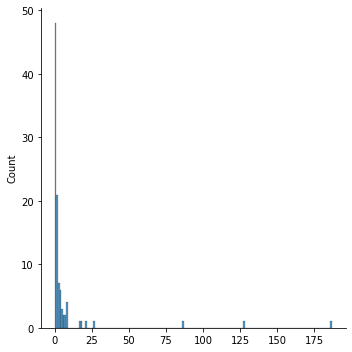

In [116]:
#Plotting the F-distribution
fdata = f.rvs(dfn = 5, dfd = 2, size = 100)
sns.displot(fdata)

In [117]:
#Hypothesis Testing
# [1] State the Null Hypothesis (Ho)
# [2] Alternate Hypotheis (H1 or Ha) is defined based on Null Hypothesis
# Test Statistic to compute the p-value: Significance Value
# State alpha=0.05 (CI=95%)
# if p-value < 0.05 Null Hypothesis (H0) else Alternate Hypothesis (Ha)

In [118]:
# Using the randn function to create random numbers in the given range
# Case 1 : 
data1 = 20 * randn(1000) + 100
data2 = (10 * randn(1000) + 50)

In [119]:
# Calculating the corelation between data1 and data2
cor, p= pearsonr(data1,data2)
print("co-relation : {:.5f}  \np : {:.5f}".format(cor,p))

co-relation : nan  
p : nan


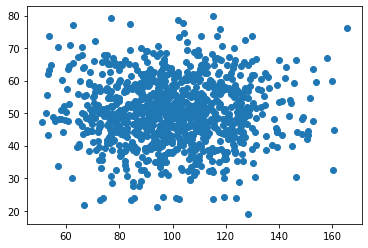

In [120]:
# Plotting the data using scatterplot
plt.scatter(data1,data2)

In [121]:
#Are data1 and data2 related
alpha = 0.05 # CI=95 %
if p > alpha:
  print("No correlation-Fail to Reject Ho")
else:
  print("Some correlation-Reject Ho")

Some correlation-Reject Ho


In [122]:
# Import KDDCUP IDS Dataset 
url = 'http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz'
#Create a dataframe
df = pd.read_csv(url)
#To see the dimensions of the dataset
df.shape

(494020, 42)

In [123]:
# The CSV file has no column heads, so add them
df.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome'
]

In [124]:
#Sample1 and Sample2 (Numerical)- T-Test
sample1 = df.sample(frac=0.1,replace=False)
sample2 = df.sample(frac=0.1,replace=False)

In [125]:
# First 5 rows of the dataset
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [126]:
# First 5 rows of sample1
sample1.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
294226,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.
403206,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.
230051,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.
350777,0,tcp,private,S0,0,0,0,0,0,0,...,10,0.04,0.07,0.00,0.00,1.0,1.0,0.0,0.0,neptune.
4629,0,tcp,http,SF,239,266,0,0,0,0,...,255,1.00,0.00,0.01,0.05,0.0,0.0,0.0,0.0,normal.


In [127]:
# Shape of sample1
sample1.shape

(49402, 42)

In [128]:
# Data types of the features
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [129]:
# Calculating the population mean of the dataset
popmean = df.duration.mean()
s1mean = sample1.duration.mean()
s2mean = sample2.duration.mean()
print("Population mean of dataset : ",popmean)
print("Population mean of sample1 : ",s1mean)
print("Population mean of sample2 : ",s2mean)

Population mean of dataset :  47.97939961944861
Population mean of sample1 :  53.62809198008178
Population mean of sample2 :  46.38595603416866


In [130]:
# Independent T test
print("Independent T test : ")
stats,p = ttest_ind(sample1['duration'],sample2['duration'])
print("p : ",p)

#State Ho: Same Distribution, Ha=Different Distribution
if p > alpha:
  print('Same Distribution-Fail to Reject Ho')
else:
  print('Different Distribution-Reject Ha')

Independent T test : 
p :  0.11925760219107388
Same Distribution-Fail to Reject Ho


In [131]:
# Types of unique protocols
df.protocol_type.unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [132]:
# One Sample T test
print("One sample T test : ")
tset, p_val = ttest_1samp(sample1['duration'], sample2['duration'])
print("p : ",p_val.max())

#State Ho: Same Distribution, Ha=Different Distribution
if p_val.max() > alpha:
  print('Same Distribution-Fail to Reject Ho')
else:
  print('Different Distribution-Reject Ha')

One sample T test : 
p :  0.9177496797222586
Same Distribution-Fail to Reject Ho


In [133]:
#One numerical and One way ANOVA Test
print("One Way ANOVA test : ")
F, p = f_oneway(sample1['duration'], sample2['duration'])
print("p : ",p)
if p > alpha:
  print('Same Distribution-Fail to Reject Ho')
else:
  print('Different Distribution-Reject Ha')


One Way ANOVA test : 
p :  0.11925760219731174
Same Distribution-Fail to Reject Ho


In [134]:
#Two Categorical- Chi-Square Test
print("Two Categorical Chi squared Test : ")

chi_square = sum([(o-e)**2 for o,e in zip(sample1['duration'],sample2['duration'])])
chi_square_statistic = chi_square//(sample1.shape[1]) 

ddof = (sample1.shape[0] - 1)*(sample1.shape[1] - 1)

p_value = chi2.cdf(x=chi_square_statistic,df=ddof)

print('p-value:',p_value)

if p > alpha:
  print('Same Distribution-Fail to Reject Ho')
else:
  print('Different Distribution-Reject Ha')


Two Categorical Chi squared Test : 
p-value: 1.0
Same Distribution-Fail to Reject Ho


In [135]:
#Two Numerical variable-Correlation test
print("Corelation test using Pearson's method : ")
stats, p = pearsonr(sample1['duration'], sample2['duration'])
print("p : ",p)

if p > alpha:
  print('Same Distribution-Fail to Reject Ho')
else:
  print('Different Distribution-Reject Ha')


Corelation test using Pearson's method : 
p :  0.6343386002089779
Same Distribution-Fail to Reject Ho


<style>
div.blue { background-color:#e6f0ff; border-radius: 5px; padding: 20px;}
</style>
<div class = "blue">
<strong>Conclusion : </strong>
<br/>
From the experiment conducted, it can be concluded that the Scipy library in Python has various tools to calculate probabilities, densities, quantiles and random variates of different distributions such as normal, poisson's, exponential, binomial etc. These distributions can be easily plotted using the Seaborn library which helps us in visualising the data and thus help us solve real world problems. Various hypothesis testing tools are also inbuilt which can be used to determine the p-value of the data and thus help in analysis.

</div>